In [1]:
import sys
import json 
import warnings
import pandas as pd
from prophet import Prophet
from ast import literal_eval
from urllib.request import urlopen

sys.path.append("../")
from helpers import tsplot,plot_predictions,get_country_holydays,is_weekend,optimizeProphet
warnings.filterwarnings('ignore')
PC = '#FF3B2B'

Importing plotly failed. Interactive plots will not work.


In [2]:
data = pd.read_csv("../Datasets\wiki_views_2010010100_2022043000.csv",index_col=[0],nrows=1100)
data.index = pd.DatetimeIndex(data.index)
test = data.iloc[1000:]
data = data.iloc[0:1000]

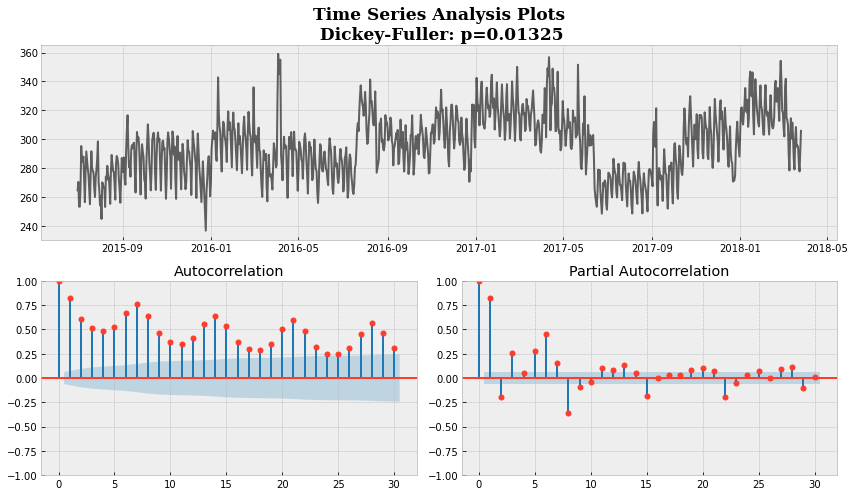

In [3]:
tsplot(data.views)

In [4]:
param_grid = {  'growth': ["linear"], 
                'yearly_seasonality': ["auto"],
                'weekly_seasonality': ["auto"],
                'daily_seasonality': [False],
                'seasonality_mode': ["additive"],
                'seasonality_prior_scale': [10, 50],
                'changepoint_prior_scale': [0.1, 0.33, 0.66],
                'mcmc_samples': [0],
                'interval_width': [0.25, 0.5, 0.75],
                'uncertainty_samples': [0]
              }

In [5]:
train = data.reset_index().rename(columns={"index":"ds","views":"y"})
test = test.reset_index().rename(columns={"index":"ds","views":"y"})

In [6]:
df_ps,df_p,df_cv = optimizeProphet(param_grid=param_grid,train=train,initial='900 days',period=None,horizon='21 days')

  0%|          | 0/18 [00:00<?, ?it/s]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

  6%|▌         | 1/18 [00:23<06:44, 23.78s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

 11%|█         | 2/18 [00:46<06:11, 23.23s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

 17%|█▋        | 3/18 [01:09<05:46, 23.07s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

 22%|██▏       | 4/18 [01:43<06:23, 27.38s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

 28%|██▊       | 5/18 [02:17<06:25, 29.66s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

 33%|███▎      | 6/18 [02:51<06:13, 31.15s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

 39%|███▉      | 7/18 [03:26<05:56, 32.45s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

 44%|████▍     | 8/18 [04:01<05:34, 33.44s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

 50%|█████     | 9/18 [04:37<05:06, 34.02s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

 56%|█████▌    | 10/18 [04:57<03:58, 29.87s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

 61%|██████    | 11/18 [05:18<03:09, 27.09s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

 67%|██████▋   | 12/18 [05:39<02:30, 25.11s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

 72%|███████▏  | 13/18 [06:14<02:20, 28.18s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

 78%|███████▊  | 14/18 [06:49<02:01, 30.33s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

 83%|████████▎ | 15/18 [07:25<01:35, 31.96s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

 89%|████████▉ | 16/18 [08:03<01:07, 33.88s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

 94%|█████████▍| 17/18 [08:43<00:35, 35.57s/it]INFO:prophet:Making 8 forecasts with cutoffs between 2017-12-21 12:00:00 and 2018-03-05 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 18/18 [09:22<00:00, 31.27s/it]


In [7]:
kwargs = dict(zip(tuple(param_grid.keys()),literal_eval(df_ps.params.values[0])))

In [8]:
m = Prophet(**kwargs)
m.fit(train)
forecasets = m.predict(df=test)

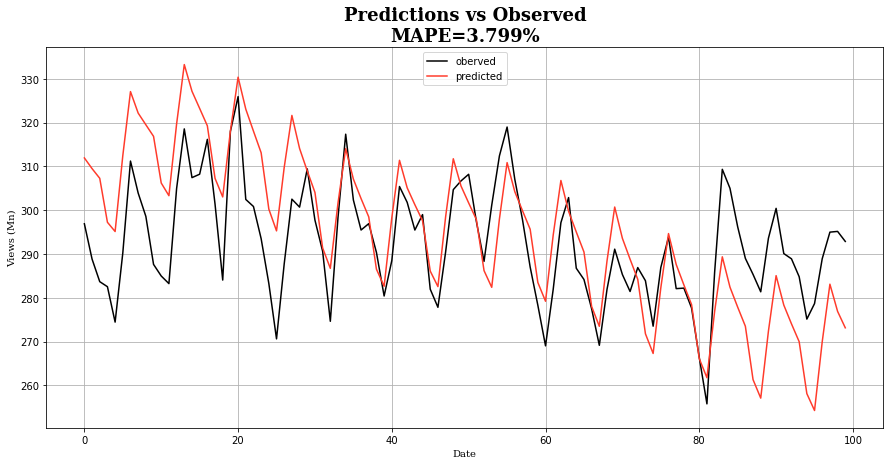

In [9]:
plot_predictions(test['y'],forecasets['yhat'])

In [10]:
with urlopen("https://wikimedia.org/api/rest_v1/metrics/pageviews/top-by-country/all-projects/all-access/2015/07") as resp:
    content = json.loads(resp.read())
top_countries = pd.DataFrame(content['items'][0]['countries']).head(20)
top_countries

,country,views,rank,views_ceil
0,US,1000000000-9999999999,1,4113821000
1,JP,1000000000-9999999999,2,1240222000
2,DE,1000000000-9999999999,3,1030194000
3,GB,100000000-999999999,4,787245000
4,RU,100000000-999999999,5,615281000
5,FR,100000000-999999999,6,597015000
6,IT,100000000-999999999,7,500709000
7,IN,100000000-999999999,8,491424000
8,CA,100000000-999999999,9,394810000
9,BR,100000000-999999999,10,302334000


In [11]:
top_countries['ratio'] = top_countries.views_ceil/top_countries.views_ceil.sum()
top_countries.head()

,country,views,rank,views_ceil,ratio
0,US,1000000000-9999999999,1,4113821000,0.338947
1,JP,1000000000-9999999999,2,1240222000,0.102185
2,DE,1000000000-9999999999,3,1030194000,0.084880
3,GB,100000000-999999999,4,787245000,0.064863
4,RU,100000000-999999999,5,615281000,0.050694


In [12]:
weights = dict(zip(top_countries.country.values,top_countries.ratio.values))

In [13]:
holyday_list_weighted = get_country_holydays(top_countries.country.values,2015,2018,weights=weights)
holyday_list = get_country_holydays(top_countries.country.values,2015,2018,weights=None)

In [14]:
train['holyday_weight'] = holyday_list_weighted[data.index].values
test['holyday_weight'] = holyday_list_weighted[test.index].values

train['holyday'] = holyday_list_weighted[data.index].values
test['holyday'] = holyday_list_weighted[test.index].values

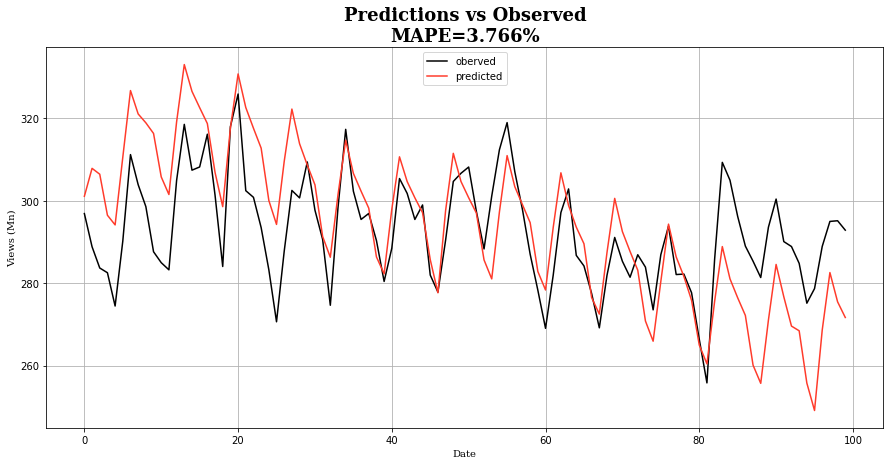

In [15]:
m = Prophet(**kwargs)
m.add_regressor('holyday_weight')
m.fit(train)
forecasets = m.predict(df=test)
plot_predictions(test['y'],forecasets['yhat'])

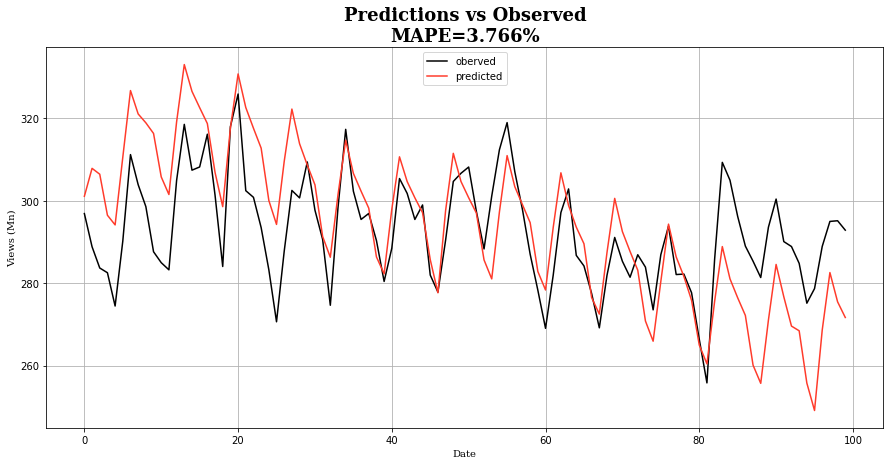

In [16]:
m = Prophet(**kwargs)
m.add_regressor('holyday')
m.fit(train)
forecasets = m.predict(df=test)
plot_predictions(test['y'],forecasets['yhat'])

In [17]:
train['weekend']=is_weekend(data)['weekend'].values

In [18]:
test['weekend']=is_weekend(test.set_index("ds"))['weekend'].values

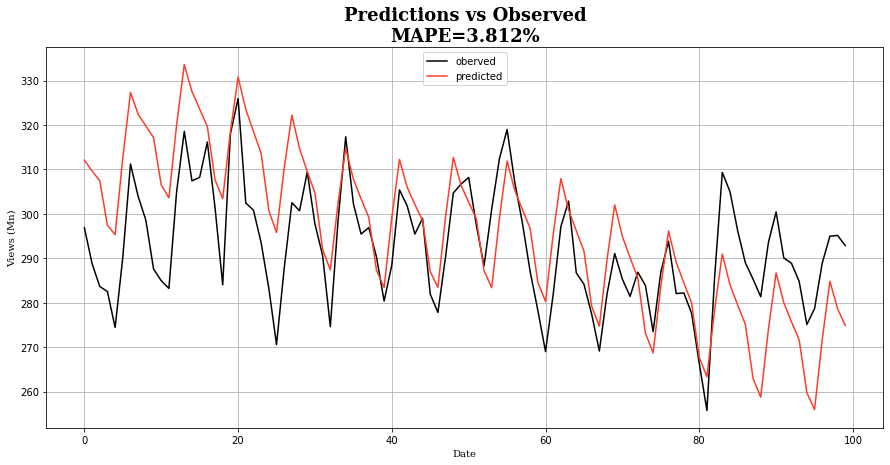

In [19]:
m = Prophet(**kwargs)
m.add_regressor('weekend')
m.fit(train)
forecasets = m.predict(df=test)
plot_predictions(test['y'],forecasets['yhat'])